#### Import models from torchvision 

Import models from torchvision module and see what are the different models and architectures available with us.

Notice that there is one entry called AlexNet and one called alexnet.The capotalized name AlexNet refer to the Python class where as the lower case name alexnet refers the function that returns the model instantiated from the AlexNet Class 

In [20]:
from torchvision import models 
import torch 

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

dir(models)

['AlexNet',
 'DenseNet',
 'Inception3',
 'ResNet',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'inception',
 'inception_v3',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn']



#### Step1: Load the Pre-trained Model 

Note that PyTorch models have an extention of .pt or .pth 


In [21]:
alexnet = models.alexnet(pretrained = True )

Once the weights have been downloaded, we can process with the other steps. We can also check out some details of the networks architecture as follows. 

In [22]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

#### Specify Image Transformations 

Once we have the model with us, the next step is to transform the input image so that they have the right shape and other characteristics like mean and standard deviation. These values should be similar to the ones which were used while training the model. This makes sure that the network will produce meaningful answers.

We can pre-process the input image with the help of transforms present in TochVision module. In this case, we can use the following transforms for both AlexNet and ResNet.

In [23]:
from torchvision import transforms

transform = transforms.Compose([transforms.Resize(256), 
                                transforms.CenterCrop(224), 
                                transforms.ToTensor(), 
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

In [24]:
img = Image.open("Poodle.jpg")

img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [25]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [26]:
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [27]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

miniature poodle 75.34286499023438


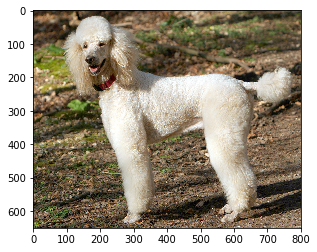

In [30]:
_, index = torch.max(out, 1)
 
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
 
print(labels[index[0]], percentage[index[0]].item())

plt.imshow(np.asarray(img))

#### Using ResNet

In [29]:
# First load the model 

resnet = models.resnet152(pretrained=True)


# Second, put the network in eval mode

resnet.eval() 


#Third, carry out model inference 
out = resnet(batch_t)

# Fourth, print the top 5 classes predicted by the model 

_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to C:\Users\akhare/.cache\torch\checkpoints\resnet152-b121ed2d.pth
100.0%


[('miniature poodle', 75.34286499023438),
 ('standard poodle', 21.987083435058594),
 ('toy poodle', 2.6564807891845703),
 ('Bedlington terrier', 0.009290513582527637),
 ('Kerry blue terrier', 0.0009393919608555734)]

miniature poodle 75.34286499023438


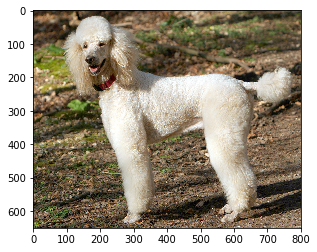

In [31]:
_, index = torch.max(out, 1)
 
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
 
print(labels[index[0]], percentage[index[0]].item())

plt.imshow(np.asarray(img))